<a href="https://colab.research.google.com/github/wellmej/DataScienceUseCases/blob/main/Text_Analytics_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#--------------------------------------------------------------------------------#
#                                                                                #
#  --------------------                                                          #
#  Text Analytics v2                                                             #
#  --------------------                                                          #
#                                                                                #
#   This Python module uses VaderSentiment routines to anaylize text sentiment   #
#                                                                                #
#   This version works on SENTENCE Sentiment, not individual Word Sentiment      #
#                                                                                #
#   See Text Analytics v3 for Sentiment based on individual words. Use these two #
#   to compare and contrast these approaches to sentiment analysis.              # 
#                                                                                #
#   This version also generated Word Cloud for four categories:                  # 
#     - ALL Words                                                                # 
#     - POSITIVE Words                                                           # 
#     - NEGATIVE Words                                                           # 
#     - Neutral Words                                                            # 
#                                                                                #
#   Note: Text Aanlytics v1 is not very useful, was an early example used        #
#         to begin learning Python Sentiment Analysis                            #
#                                                                                #
#                                                                                #
#--------------------------------------------------------------------------------#
#

In [2]:
#Loading NLTK
import nltk
import nltk.data
nltk.download('punkt')
#nltk.download()
#nltk.download()
#nltk.download('pickle')
#sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Package punkt is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Sentiment Analysis
# Import pandas
#import pandas as pd

# /Temp/movie_data/aclImdb/test/neg/

# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
# 
# This google.colab mount command will give you access to your own google storage
# area. You can maintain it via your goggle account. Signon to your account, select Drive from the box of circles icon

from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

# You have to include the full link to the csv file containing your dataset
#C:\Users\jrwel\Documents\Udemy\Data Science Real-World Case Studies\Data\Case4
#X_Ray_Directory = 'C:/Users/jrwel/Documents/Udemy/Data Science Real-World Case Studies/Data/Case4/Dataset'
#employee_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Case Studies/Case1/Human_Resources.csv')
#employee_df = pd.read_csv('C:/Users/jrwel/Documents/Udemy/Data Science Real-World Case Studies/Data/Case1/Human_Resource.csv')
#employee_df = pd.read_csv(hr_file)
#employee_df



# Read in the CSV file and convert "?" to NaN
#text_file = "C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/AAA_Hike.txt"
#text_file = "C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/Metamorphosis.txt"
#text_file = "C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/Frankenstein.txt"
#text_file = "C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/PubMahone.txt"

#


Mounted at /content/drive


UnicodeDecodeError: ignored

In [10]:
text_file = '/content/drive/MyDrive/Colab Notebooks/Data Science Case Studies/Sentiment/AAA_Hike.txt'
#text_file = "C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/Temp/movie_data/aclImdb/train/neg/reviews_combined.txt"
text_read = open(text_file,'r', encoding='cp1252')
#text=pd.read_csv(text_file, encoding='cp1252')
text = text_read.read()

In [11]:
#nltk.set_proxy('http://confserver.ent.nwie.net/proxy/outbound.pac')
#nltk.download()

In [12]:
print(nltk.__version__)

3.2.5


In [13]:
#print(text)
text_orig = text



In [14]:
#Remove Punctuartion
import re

text_no_punc = re.sub(r'[^\w\d\s]+', "", text)

#print(out) 

In [15]:
#Convert all characters to lower case
text_lower_no_punc=text_no_punc.lower()
#print(text_lower_no_punc)

In [16]:
#Sentence Tokenization

from nltk.tokenize import sent_tokenize

tokenized_sent=sent_tokenize(text_lower_no_punc)
#print(tokenized_sent)


In [17]:
#Word Tokenization
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text_lower_no_punc)
print(tokenized_word)

['a', 'guide', 'to', 'scenic', 'hikes', 'in', 'ohio', 'descriptions', 'of', 'over', '30', 'dayhikes', 'in', 'the', 'buckeye', 'state', 'jack', 'wellmerling', 'copyright', '2003', 'this', 'book', 'is', 'dedicated', 'with', 'all', 'my', 'love', 'to', 'my', 'two', 'sons', 'jack', 'and', 'kyle', 'who', 'accompanied', 'me', 'on', 'many', 'of', 'these', 'hikes', 'and', 'to', 'my', 'wife', 'sue', 'who', 'had', 'the', 'patience', 'to', 'hike', 'with', 'me', 'too', 'and', 'put', 'up', 'with', 'three', 'very', 'muddy', 'boys', 'central', 'ohio', '7', '1', 'alum', 'creek', 'multipurpose', 'trail', '7', '2', 'battelledarby', 'metro', 'park', '8', '3', 'chestnut', 'ridge', 'metro', 'park', '10', '4', 'clifton', 'gorge', 'state', 'nature', 'preserve', '11', '5', 'glen', 'helen', 'trail', 'system', '12', '6', 'indian', 'lake', 'state', 'park', 'pew', 'island', 'trail', '14', '7', 'mohican', 'state', 'park', 'lyons', 'falls', 'trail', '15', '8', 'prairie', 'oaks', 'sycamore', 'plains', 'trail', '15', 

In [18]:
#Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
#fdist = FreqDist(text)
print(fdist)

<FreqDist with 2278 samples and 18949 outcomes>


In [20]:
# Make single/plural looks the same ('whale' & 'whales' to both be 'whale')
import nltk
nltk.download('wordnet')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
lemmatizer = nltk.stem.WordNetLemmatizer()
test = text_lower_no_punc
tokens = tokenizer.tokenize(test)
lemmas = [lemmatizer.lemmatize(t) for t in tokens]
fdist = nltk.FreqDist(lemmas)
common = fdist.most_common(100)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
# Show the n number of most common words (n=15 or similar)
fdist.most_common(50)

[('the', 1790),
 ('to', 664),
 ('a', 661),
 ('trail', 644),
 ('and', 559),
 ('of', 385),
 ('you', 316),
 ('on', 280),
 ('is', 254),
 ('in', 194),
 ('right', 189),
 ('area', 185),
 ('will', 184),
 ('left', 171),
 ('mile', 168),
 ('turn', 166),
 ('it', 140),
 ('road', 134),
 ('from', 132),
 ('follow', 121),
 ('this', 114),
 ('take', 113),
 ('that', 106),
 ('your', 103),
 ('be', 102),
 ('then', 98),
 ('where', 94),
 ('at', 93),
 ('with', 90),
 ('for', 90),
 ('go', 86),
 ('cross', 84),
 ('parking', 83),
 ('creek', 81),
 ('here', 81),
 ('bridge', 75),
 ('which', 73),
 ('through', 73),
 ('can', 72),
 ('back', 71),
 ('see', 69),
 ('an', 69),
 ('down', 69),
 ('there', 68),
 ('up', 66),
 ('are', 66),
 ('small', 65),
 ('about', 64),
 ('into', 63),
 ('sign', 61)]

In [22]:
#
# Print Lemmas in the body of the text - WTF?
#
print(lemmas)

['a', 'guide', 'to', 'scenic', 'hike', 'in', 'ohio', 'description', 'of', 'over', '30', 'dayhikes', 'in', 'the', 'buckeye', 'state', 'jack', 'wellmerling', 'copyright', '2003', 'this', 'book', 'is', 'dedicated', 'with', 'all', 'my', 'love', 'to', 'my', 'two', 'son', 'jack', 'and', 'kyle', 'who', 'accompanied', 'me', 'on', 'many', 'of', 'these', 'hike', 'and', 'to', 'my', 'wife', 'sue', 'who', 'had', 'the', 'patience', 'to', 'hike', 'with', 'me', 'too', 'and', 'put', 'up', 'with', 'three', 'very', 'muddy', 'boy', 'central', 'ohio', '7', '1', 'alum', 'creek', 'multipurpose', 'trail', '7', '2', 'battelledarby', 'metro', 'park', '8', '3', 'chestnut', 'ridge', 'metro', 'park', '10', '4', 'clifton', 'gorge', 'state', 'nature', 'preserve', '11', '5', 'glen', 'helen', 'trail', 'system', '12', '6', 'indian', 'lake', 'state', 'park', 'pew', 'island', 'trail', '14', '7', 'mohican', 'state', 'park', 'lyon', 'fall', 'trail', '15', '8', 'prairie', 'oak', 'sycamore', 'plain', 'trail', '15', '9', 'twi

In [23]:
from nltk.corpus import wordnet

syns = wordnet.synsets("time")

print(syns[0].name())
print(syns[0].lemmas()[0].name())
print(syns[0].definition())
print(syns[0].examples())


time.n.01
time
an instance or single occasion for some event
['this time he succeeded', 'he called four times', 'he could do ten at a clip']


In [24]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("open"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print('Synonyms: ', set(synonyms))
print('Antonyms: ', set(antonyms))

Synonyms:  {'undefendable', 'heart-to-heart', 'loose', 'unresolved', 'spread_out', 'outdoors', 'exposed', 'undetermined', 'undecided', 'unfold', 'assailable', 'unfastened', 'spread', 'subject', 'overt', 'receptive', 'opened', 'undefended', 'capable', 'out-of-doors', 'afford', 'open', 'give', 'surface', 'open_up', 'candid', 'clear', 'open_air'}
Antonyms:  {'close', 'covert', 'unreceptive', 'closed', 'fold', 'shut'}


In [25]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
print(w1.wup_similarity(w2))

w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('cat.n.01')
print(w1.wup_similarity(w2))


0.9090909090909091
0.6956521739130435
0.32


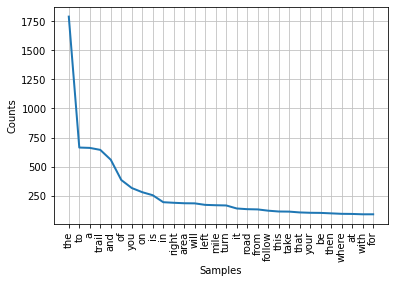

In [26]:
# Frequency Distribution Plot - of unscrubbed raw text
#
#--------------------------------------------------------
# Run this one twice to see the diagram!!!!!!  <<<=======
#--------------------------------------------------------
#
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [28]:
#Stop Words
nltk.download('stopwords')
#from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
#stop_words=stop_words + str('take')
print(stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'your', "isn't", "needn't", 'am', 'up', 'any', 'd', 'do', 'it', 'through', 'against', 'then', 'didn', 'herself', 'for', 'about', 'have', 'you', 'after', 't', 'its', "mightn't", "you've", 'being', "you'd", "she's", 'and', 'so', 'which', 'a', "shouldn't", 'to', 'this', 'when', "doesn't", 'ain', 'shouldn', 'having', 'under', 'most', 'now', 'shan', 'off', 'as', 're', "haven't", 'weren', 'these', 'an', "don't", 'that', 'during', 'by', "should've", 'nor', "hasn't", 'there', 'ma', 'should', 'same', 'just', 'they', 'are', 'me', 'she', 'i', 'couldn', 'yourselves', "you'll", 'm', 'himself', "wouldn't", 'yours', 'theirs', 'wasn', "you're", "won't", "shan't", 'o', 'because', 'at', 'whom', 'needn', 'both', 'yourself', 'we', 'of', 'my', 'between', 's', 'mightn', 'further', 'on', "mustn't", 'her', 'until', "weren't", 'few', 'hers', 'some', 'why', 'again', "didn't", 'while', 'won', "hadn't",

In [29]:
# Customize stopwords if necessary (by adding word1, word2, word-n, etc.)
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['word1','wa', 'br', 'gutenbergtm', 'chapter']
stopwords.extend(newStopWords)
stop_words = stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
#Remove Stop Words
#print("Begin Tokenized Sentence: ", tokenized_word)
text_removed=[]
for w in tokenized_word:
    if w not in stop_words:
        text_removed.append(w)
#print("Tokenized Word List:",tokenized_word)
print("Filterd Sentence:",text_removed)
text_clean = text_removed

Filterd Sentence: ['guide', 'scenic', 'hikes', 'ohio', 'descriptions', '30', 'dayhikes', 'buckeye', 'state', 'jack', 'wellmerling', 'copyright', '2003', 'book', 'dedicated', 'love', 'two', 'sons', 'jack', 'kyle', 'accompanied', 'many', 'hikes', 'wife', 'sue', 'patience', 'hike', 'put', 'three', 'muddy', 'boys', 'central', 'ohio', '7', '1', 'alum', 'creek', 'multipurpose', 'trail', '7', '2', 'battelledarby', 'metro', 'park', '8', '3', 'chestnut', 'ridge', 'metro', 'park', '10', '4', 'clifton', 'gorge', 'state', 'nature', 'preserve', '11', '5', 'glen', 'helen', 'trail', 'system', '12', '6', 'indian', 'lake', 'state', 'park', 'pew', 'island', 'trail', '14', '7', 'mohican', 'state', 'park', 'lyons', 'falls', 'trail', '15', '8', 'prairie', 'oaks', 'sycamore', 'plains', 'trail', '15', '9', 'twin', 'lakes', 'trail', 'area', 'oshaughnesy', 'reservoir', '16', '10', 'winter', 'roadseymour', 'woods', 'nature', 'preserve', '17', 'northeastern', 'ohio', '19', '11', 'atwood', 'lake', 'park', 'mingo'

In [31]:
#Frequency Distribution after STOP word removal
from nltk.probability import FreqDist
fdist = FreqDist(text_clean)
#fdist = FreqDist(text)
print(fdist)

fdist.most_common(50)



<FreqDist with 2171 samples and 10782 outcomes>


[('trail', 631),
 ('right', 189),
 ('area', 172),
 ('left', 171),
 ('road', 133),
 ('turn', 125),
 ('follow', 121),
 ('take', 103),
 ('miles', 101),
 ('parking', 83),
 ('creek', 80),
 ('back', 71),
 ('see', 69),
 ('bridge', 68),
 ('mile', 67),
 ('small', 65),
 ('go', 59),
 ('lot', 58),
 ('loop', 56),
 ('woods', 55),
 ('path', 55),
 ('steps', 55),
 ('park', 54),
 ('cross', 52),
 ('sign', 52),
 ('distance', 50),
 ('stream', 49),
 ('old', 45),
 ('continue', 45),
 ('hike', 44),
 ('soon', 44),
 ('short', 43),
 ('falls', 42),
 ('way', 41),
 ('turns', 41),
 ('rock', 40),
 ('trees', 39),
 ('lake', 38),
 ('water', 38),
 ('pass', 38),
 ('view', 38),
 ('description', 37),
 ('ridge', 36),
 ('enjoy', 36),
 ('directions', 36),
 ('north', 35),
 ('near', 34),
 ('past', 34),
 ('leads', 34),
 ('along', 33)]

In [32]:
# Show the n number of most common words (n=15 or similar)
fdist.most_common(25)

[('trail', 631),
 ('right', 189),
 ('area', 172),
 ('left', 171),
 ('road', 133),
 ('turn', 125),
 ('follow', 121),
 ('take', 103),
 ('miles', 101),
 ('parking', 83),
 ('creek', 80),
 ('back', 71),
 ('see', 69),
 ('bridge', 68),
 ('mile', 67),
 ('small', 65),
 ('go', 59),
 ('lot', 58),
 ('loop', 56),
 ('woods', 55),
 ('path', 55),
 ('steps', 55),
 ('park', 54),
 ('cross', 52),
 ('sign', 52)]

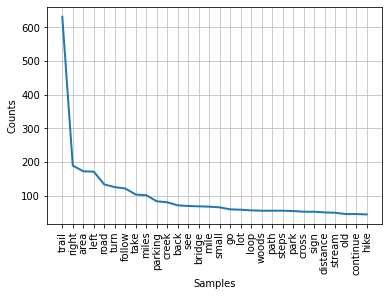

In [33]:
# Frequency Distribution Plot?? Of letters?
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
#plt.figure(figsize=(88,44))


#freqdist = nltk.FreqDist(words)
#plt.figure(figsize=(16,5))
#freqdist.plot(50)

In [34]:
#print(text_clean)

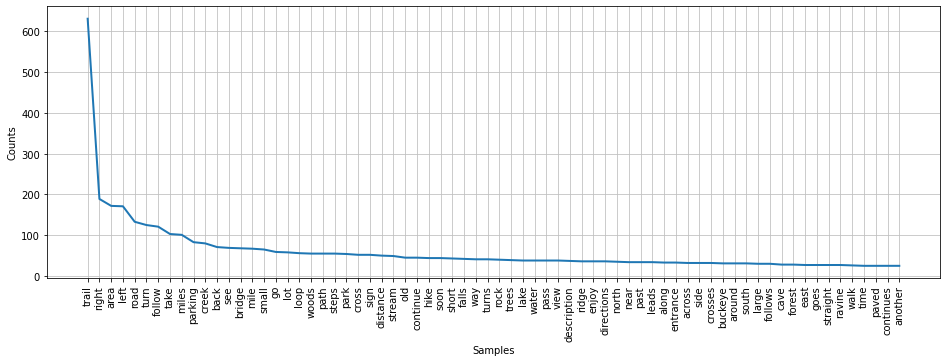

In [35]:
freqdist = nltk.FreqDist(text_clean)
plt.figure(figsize=(16,5))
freqdist.plot(70)

In [36]:
#sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(text_lower_no_punc)
print(tokens)

['a', 'guide', 'to', 'scenic', 'hikes', 'in', 'ohio', 'descriptions', 'of', 'over', '30', 'dayhikes', 'in', 'the', 'buckeye', 'state', 'jack', 'wellmerling', 'copyright', '2003', 'this', 'book', 'is', 'dedicated', 'with', 'all', 'my', 'love', 'to', 'my', 'two', 'sons', 'jack', 'and', 'kyle', 'who', 'accompanied', 'me', 'on', 'many', 'of', 'these', 'hikes', 'and', 'to', 'my', 'wife', 'sue', 'who', 'had', 'the', 'patience', 'to', 'hike', 'with', 'me', 'too', 'and', 'put', 'up', 'with', 'three', 'very', 'muddy', 'boys', 'central', 'ohio', '7', '1', 'alum', 'creek', 'multipurpose', 'trail', '7', '2', 'battelledarby', 'metro', 'park', '8', '3', 'chestnut', 'ridge', 'metro', 'park', '10', '4', 'clifton', 'gorge', 'state', 'nature', 'preserve', '11', '5', 'glen', 'helen', 'trail', 'system', '12', '6', 'indian', 'lake', 'state', 'park', 'pew', 'island', 'trail', '14', '7', 'mohican', 'state', 'park', 'lyons', 'falls', 'trail', '15', '8', 'prairie', 'oaks', 'sycamore', 'plains', 'trail', '15', 

In [37]:
# Read in the CSV file and convert "?" to NaN
#df_raw = pd.read_csv("C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/Sentiment/Train2.tsv", sep='\t' )
#df_raw = pd.read_csv("C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Data/Sentiment/Test.csv" )

In [38]:
#data=pd.read_csv('train.tsv', sep='\t')
#df_raw.head()


In [39]:
data = text_clean

In [40]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [41]:

#df = pd.DataFrame(np.array(text_clean).reshape(1,10783), columns = list("w"))
df = pd.DataFrame(np.array(text_clean))
print (df)


                  0
0             guide
1            scenic
2             hikes
3              ohio
4      descriptions
...             ...
10777          back
10778        parked
10779           car
10780          jack
10781   wellmerling

[10782 rows x 1 columns]


In [42]:
# Generate Word Cloud from the Text Document
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

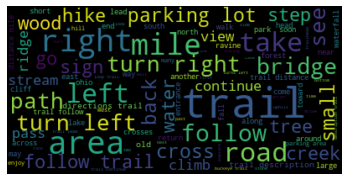

In [43]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_words,max_words=100, background_color="black",max_font_size=50).generate(text_lower_no_punc)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

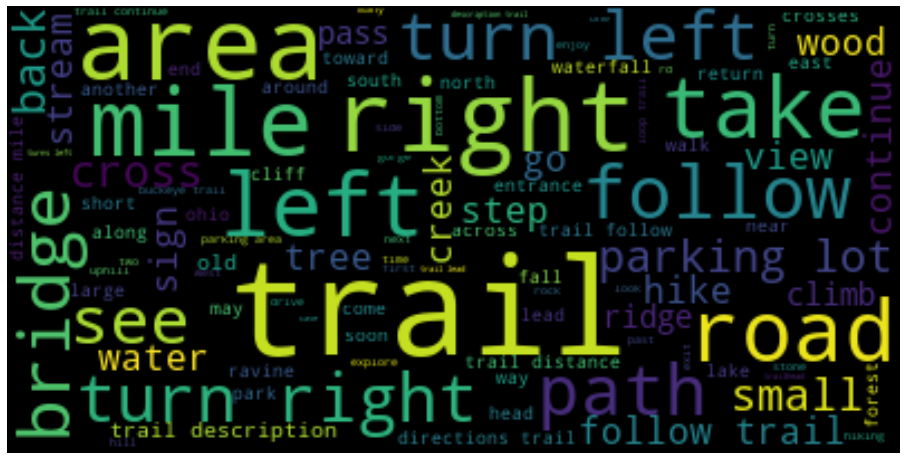

In [44]:
# Create customized WordCLoud
#from nltk.corpus import inaugural
# extract the datataset in raw format, you can also extract it in other formats as well
wordcloud = WordCloud(max_font_size=60,stopwords=stop_words,max_words=100,relative_scaling=0.5).generate(text_lower_no_punc)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Images/AAA_Hike_WordCloud1.png")

In [ ]:
palm_tree_mask = np.array(Image.open("C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Stencils/palm_tree_2.jpg"))
#wine_mask

In [ ]:
# Create customized WordCLoud
#from nltk.corpus import inaugural
# extract the datataset in raw format, you can also extract it in other formats as well
wordcloud = WordCloud(max_font_size=60,mask=palm_tree_mask,stopwords=stop_words
                      ,background_color="black"
                      ,relative_scaling=0.5
                      ,contour_width=0.25, contour_color='green').generate(text_lower_no_punc)
plt.figure(figsize=(10,8))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create customized WordCLoud with a stencil

moby_dick_mask = np.array(Image.open("C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Stencils/whale1.jpg"))
#wine_mask

# extract the datataset in raw format, you can also extract it in other formats as well
wordcloud = WordCloud(max_font_size=60,mask=moby_dick_mask,stopwords=stop_words
                      ,background_color="black"
                      ,contour_width=1, contour_color='blue').generate(text_lower_no_punc)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create customized WordCLoud with a stencil

hiking_mask = np.array(Image.open("C:/Users/wellmej/Documents/PLD-SmartRide/Admin/Training/Python/Stencils/hiking-sneakers.jpg"))
#wine_mask

# extract the datataset in raw format, you can also extract it in other formats as well
wordcloud = WordCloud(max_font_size=60,mask=hiking_mask,stopwords=stop_words
                      ,background_color="white",max_words=200
                      ,contour_width=0.25
                      ,contour_color='blue').generate(text_lower_no_punc)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# import the dataset
#from nltk.corpus import inaugural
# extract the datataset in raw format, you can also extract it in other formats as well
#text = inaugural.raw()
#wordcloud = WordCloud(max_font_size=60).generate(text)
#plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

In [48]:
pip install vaderSentiment 

     |████████████████████████████████| 133kB 5.6MB/s 


In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#import vaderSentiment
#from vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [51]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
#    print("{:-<40} {}".format(sentence, str(score)))

In [52]:
sentiment_analyzer_scores(text_lower_no_punc)
#text_lower_no_punc

In [53]:
# load dependencies  (Not really sure this even does anything)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

def return_dialog(sub):
    """
    Returns the dialog of the .srt file sub.
    Input :
        sub : name of the .srt file as a string, ex. 's01e01.srt'
    Output :
        dialog : dialog contained in .srt file as a single string
    """
    lines = []
    with open(sub) as file:
        # check the starting line of the dialog
        if sub == 'special.srt':
            start = 2
        elif int(sub[2]) == 1:   
            start = 2
        elif int(sub[2]) == 2:
            start = 7
        else:
            start = 12
        for index,line in enumerate(file):
            if index >= start:
                # check if line contains dialog
                if (index == start) or ((index == start+1) and (len(line.split()) != 0)):
                    lines.append(line.strip('\n').replace('\'',''))
                    space_index = index
                if ((index > space_index + 2) and (len(line.split()) != 0)):
                    lines.append(line.strip('\n').replace('\'',''))
                if (len(line.split()) == 0):
                    space_index = index
    # output the dialog as a single string, removing the last two lines which contain attribution
    return ' '.join(lines[:-2])
   
# construct a list of string filenames for the subtitles
subs = ['s0'+str(i)+'e0'+str(j)+'.srt' for i in range(1,4) for j in range(1,4)]
subs = subs + ['s03e0' + str(k)+'.srt' for k in range(4,7)]
subs.insert(6,'special.srt')
#Raw

In [54]:
# call the VADER analysis object 
analyzer = SentimentIntensityAnalyzer()

pols = []
#for sub in subs:
di = text_lower_no_punc
pols.append(analyzer.polarity_scores(di)['compound'])
#print(pols)

In [55]:
# Print pols result
print(pols)

[1.0]


In [56]:
# Show Sentiment score for each sentence  - DO NOT INCLUDE NEUTRAL SENTIMENT SENTENCES


rows = []
#print(text_lower_no_punc)
di = text_orig
sen = tokenize.sent_tokenize(di)
for s in sen:
    pol = analyzer.polarity_scores(s)['compound']
    # check if sentence s has sentiment/ nonzero polarity
    if pol != 0:
        # check the polarity of the sentence.
        # append a dictionary with info regarding the sentence into rows
        rows.append({'Sentence: ':s,
                     'Score': pol, 'isPos': pol>0, 'isNeutral': pol==0, 'isNeg': pol<0, 'strngPos': pol>0.5, 'strngNeg': pol<-0.5})
#        print('Sentence: ', s, 'Score', pol, 'isPos', pol>0, '/n')


# convert the rows into a dataframe for easier plotting and analysis
df = pd.DataFrame(rows)

print(df.head())

                                          Sentence:   ...  strngNeg
0  \n\nA Guide to Scenic Hikes in Ohio\n\n\n\n\n\...  ...     False
1               HELL HOLLOW WILDERNESS AREA\t23\n16.  ...      True
2  VESUVIUS RECREATION AREA – LAKESHORE LOOP\t43\...  ...     False
3  There are no 200-foot waterfalls, or snow-capp...  ...     False
4     That is where a serious hiker would go, right?  ...     False

[5 rows x 7 columns]


In [57]:
# Show Sentiment score for each sentence - DO INCLUDE NEUTRAL SENTIMENT SENTENCES


rows = []
#print(text_lower_no_punc)
di = text_orig
sen = tokenize.sent_tokenize(di)
for s in sen:
    pol = analyzer.polarity_scores(s)['compound']
    # check if sentence s has sentiment/ nonzero polarity
#    if pol != 0:
    if pol == 0:
        # check the polarity of the sentence.
        # append a dictionary with info regarding the sentence into rows
        rows.append({'Sentence: ':s,
                     'Score': pol, 'isPos': pol>0, 'isNeutral': pol==0, 'isNeg': pol<0, 'strngPos': pol>0.5, 'strngNeg': pol<-0.5})
#        print('Sentence: ', s, 'Score', pol, 'isPos', pol>0, '/n')


# convert the rows into a dataframe for easier plotting and analysis
df_neutral = pd.DataFrame(rows)

print(df_neutral.head())

                                    Sentence:   Score  ...  strngPos  strngNeg
0                          Central Ohio\t7\n1.    0.0  ...     False     False
1        ALUM CREEK MULTI-PURPOSE TRAIL\t7\n2.    0.0  ...     False     False
2             BATTELLE-DARBY METRO PARK\t8\n3.    0.0  ...     False     False
3            CHESTNUT RIDGE METRO PARK\t10\n4.    0.0  ...     False     False
4  CLIFTON GORGE STATE NATURE PRESERVE\t11\n5.    0.0  ...     False     False

[5 rows x 7 columns]


In [58]:
print(df[1:100])

                                           Sentence:   ...  strngNeg
1                HELL HOLLOW WILDERNESS AREA\t23\n16.  ...      True
2   VESUVIUS RECREATION AREA – LAKESHORE LOOP\t43\...  ...     False
3   There are no 200-foot waterfalls, or snow-capp...  ...     False
4      That is where a serious hiker would go, right?  ...     False
5             So hiking in Ohio, how fun can that be?  ...     False
..                                                ...  ...       ...
95  He was lucky and managed to grab on to the ced...  ...     False
96  The trail quickly passes to a grassy area that...  ...     False
97  The attraction was a caged bear that had been ...  ...     False
98  Rather, continue straight ahead on the north rim.  ...     False
99  In the same area, you will see a huge slice of...  ...     False

[99 rows x 7 columns]


In [59]:
df.Score.value_counts()

 0.4939    25
 0.2263    24
 0.2023    17
 0.0258    16
 0.4215    13
           ..
 0.6240     1
-0.0572     1
 0.2212     1
 0.5525     1
 0.4889     1
Name: Score, Length: 114, dtype: int64

In [60]:
df.Score.min()

-0.8328

In [61]:
df.Score.max()

0.9022

In [62]:
#df.Score.med()

In [63]:
print ('Positive')
df.isPos.value_counts()

#print(df.isPos())

Positive


True     303
False     83
Name: isPos, dtype: int64

In [64]:
print ('Negative')
df.isNeg.value_counts()

#df.isNeg.value_counts(1)

Negative


False    303
True      83
Name: isNeg, dtype: int64

In [65]:
print ('Neutral')
df_neutral.isNeutral.value_counts()

Neutral


True    805
Name: isNeutral, dtype: int64

In [66]:
print ('Strong Negative')
df.strngNeg.value_counts()

Strong Negative


False    369
True      17
Name: strngNeg, dtype: int64

In [67]:
print ('Strong Positive')
df.strngPos.value_counts()

Strong Positive


False    292
True      94
Name: strngPos, dtype: int64

       Sentence:   Score  isNeutral  isNeg  strngPos  strngNeg
isPos                                                         
False          83     83         83     83        83        83
True          303    303        303    303       303       303
           Sentence:   Score  isPos  isNeg  strngPos  strngNeg
isNeutral                                                     
False             386    386    386    386       386       386


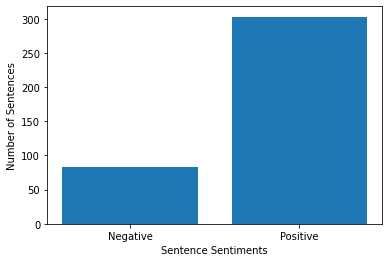

<Figure size 1152x360 with 0 Axes>

In [68]:
% matplotlib inline
Sentiment_count=df.groupby("isPos").count()

Sentiment_count2=df.groupby("isNeutral").count()
#Sentiment_count=df

print(Sentiment_count.head())
print(Sentiment_count2.head())
#print(df.head())
#print(Sentiment_count[0:10])

# Sentiment_count.index.values
#print('Index.Values: ', Sentiment_count.index.values)
objects = ('Negative', 'Positive')

#print('Sentiment_count: ', Sentiment_count['Score'])

#plt.bar(Sentiment_count.index.values, Sentiment_count['Score'])
plt.bar(objects, Sentiment_count['Sentence: '])
#plt.bar(Sentiment_count.index.values, Sentiment_count)
plt.xlabel('Sentence Sentiments')
plt.ylabel('Number of Sentences')
plt.figure(figsize=(16,5))
plt.show()

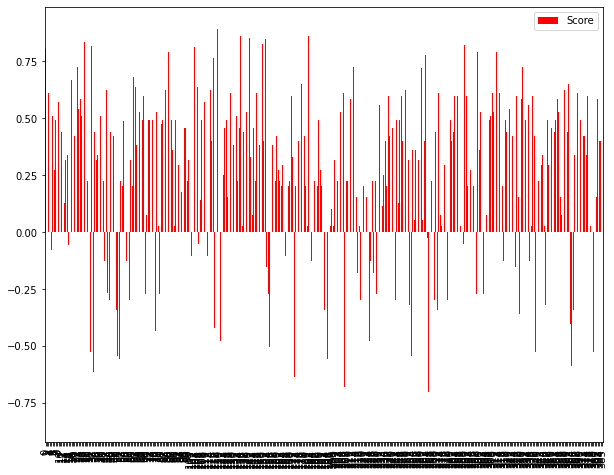

In [69]:
#temp3 = pd.crosstab(df['isPos.value_counts()'], df['isPos'])
#temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

#temp3 = pd.crosstab(df['isPos.value_counts()'], df['isPos'])
#plt.figure(figsize=(30,26))
df.plot(kind='bar', stacked=True, color=['red','blue'], grid=False, figsize=(10,8))
#plt.show

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


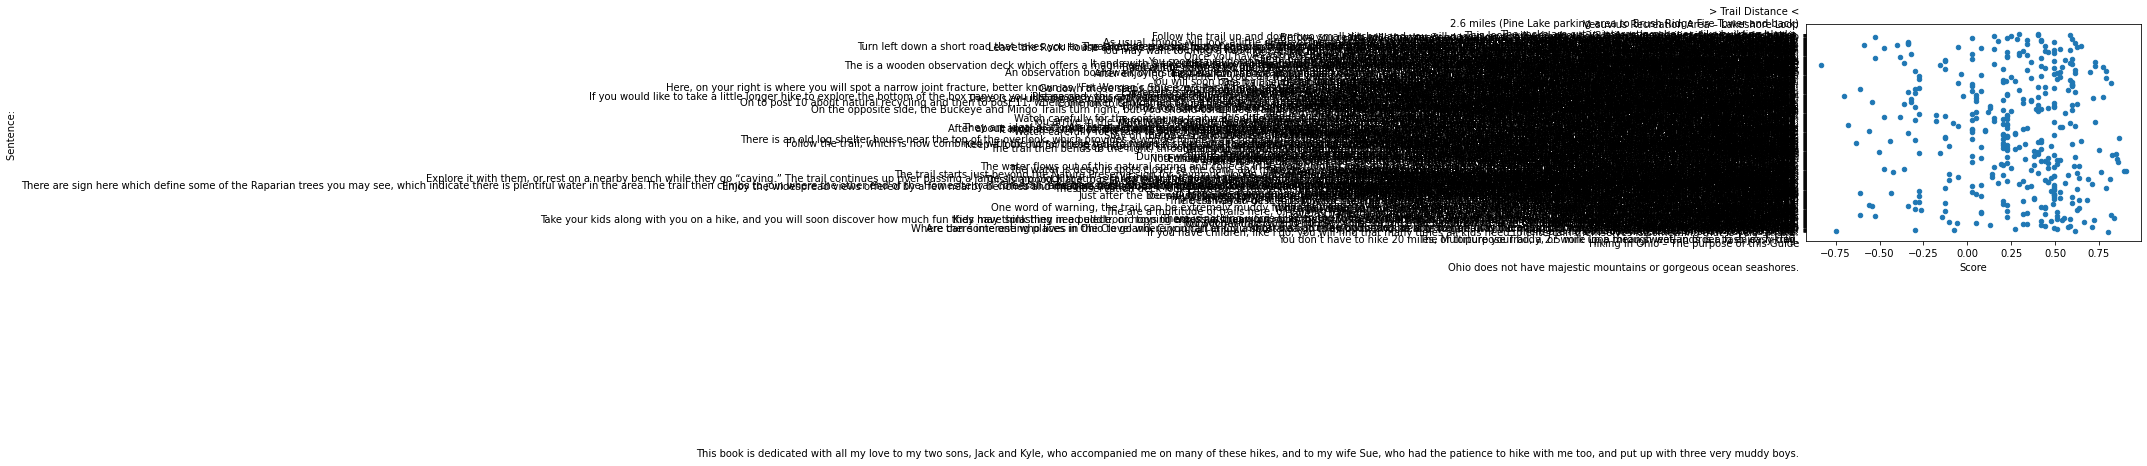

In [70]:
# Scatter Plot Sentiment
df.plot.scatter(x='Score', y = 0)

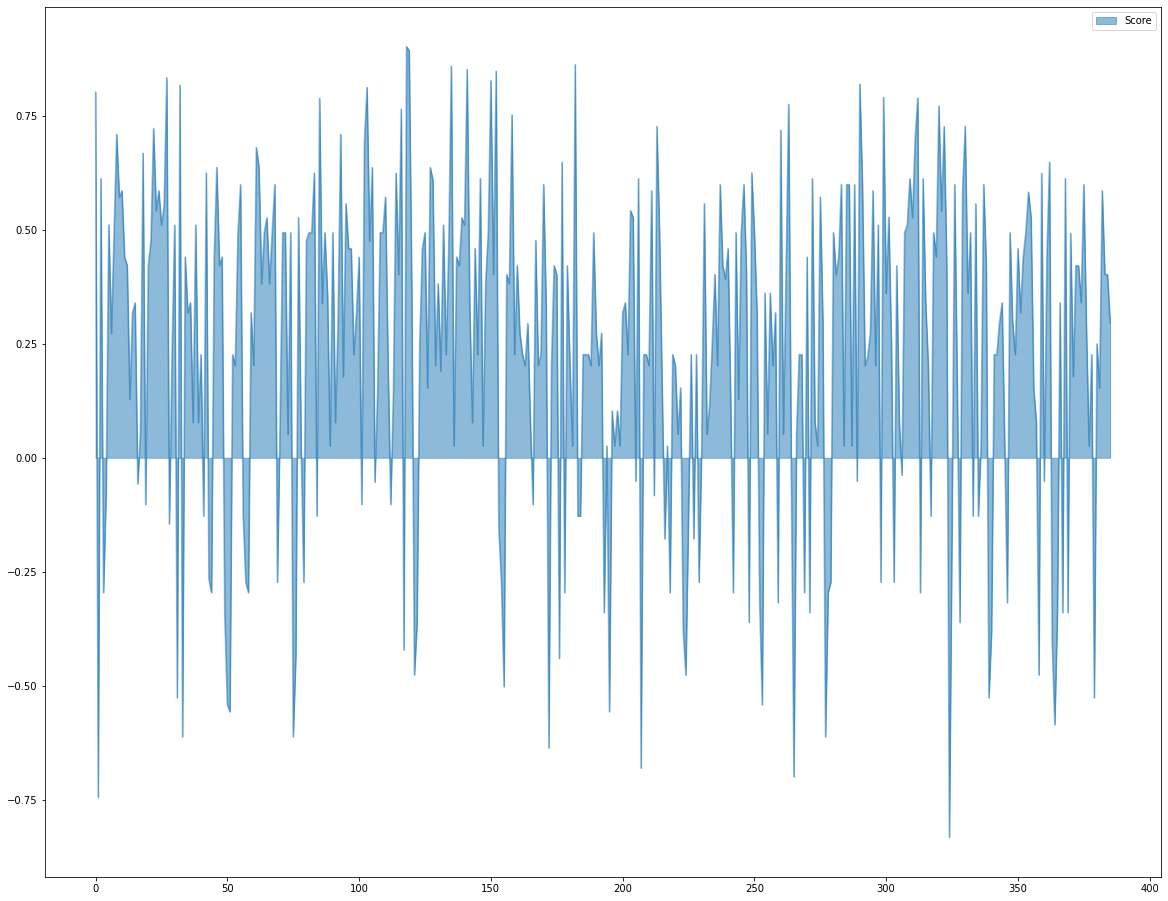

In [71]:
df.plot.area(stacked=False, figsize=(20,16))

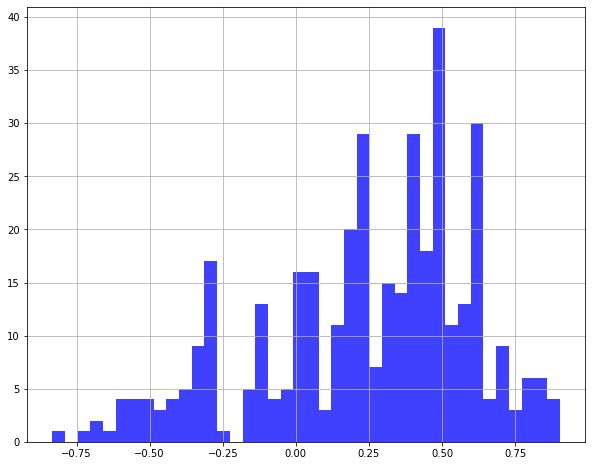

In [72]:
# Histogram Plot
# - Scores
# - color=blue

df['Score'].hist(color='b', alpha=0.75, bins=40, figsize=(10,8))

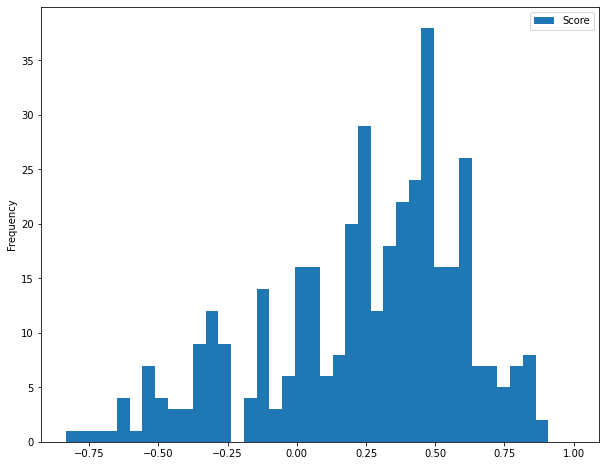

In [73]:
# Histogram Plot - Stacked
df.plot.hist(stacked=True, bins=40, figsize=(10,8))

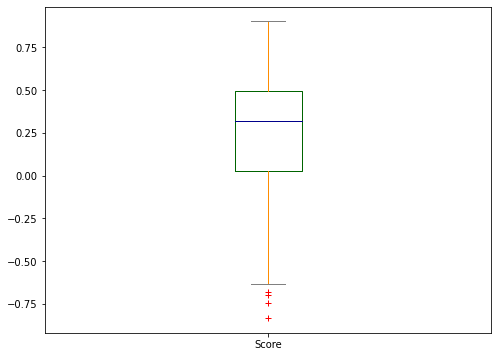

In [74]:
# Box Plot with custom colors
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')

df.plot.box(color=color, sym='r+', figsize=(8,6))

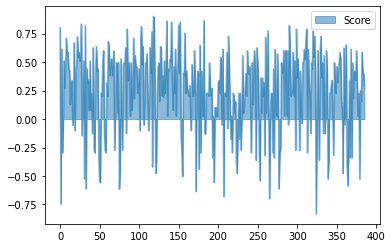

In [75]:
df.plot.area(stacked=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


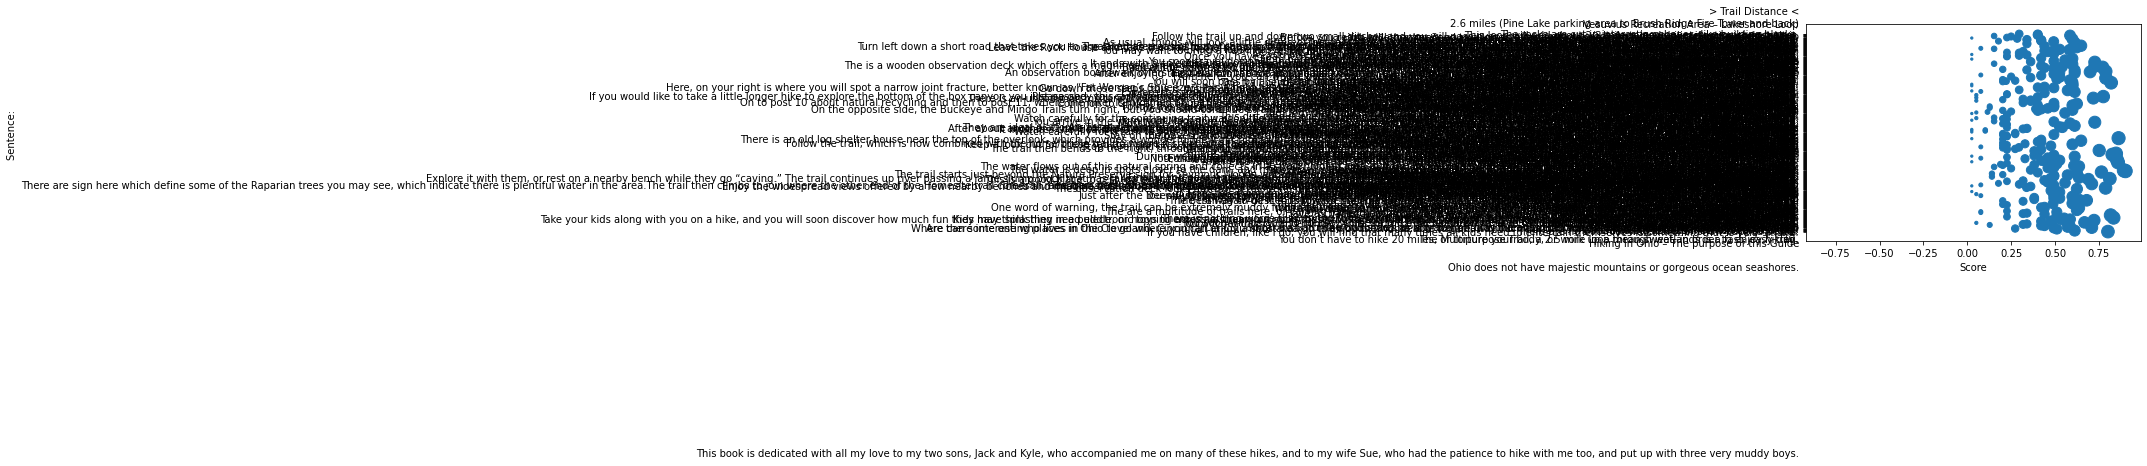

In [76]:
# Weighted (by size) scatterplot
df.plot.scatter(x='Score', y=0, s=df['Score']*200)

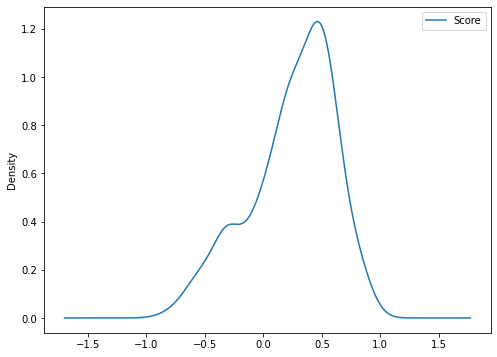

In [77]:
# Density Plot
df.plot.kde(figsize=(8,6))

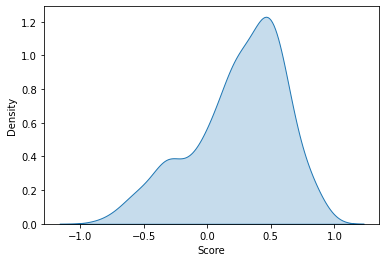

In [78]:
# library & dataset
import seaborn as sns
#df2 = sns.load_dataset('iris')
df2 = df
 
# density plot with shade
sns.kdeplot(df2['Score'], shade=True)
#sns.plt.show()


# Density Plot
#df.plot.kde(figsize=(12,10), shade='True')

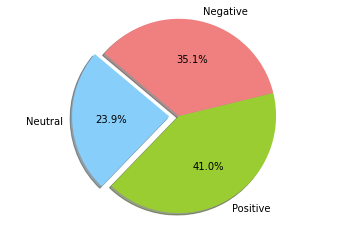

In [79]:
# Pie Chart Visualization
# Data to plot
#
# Get values from above where details are printed
#Positive
#True     1383
#False    1182
#

labels = 'Neutral', 'Positive', 'Negative'
sizes = [df_neutral.isNeutral.value_counts(), 1383, 1182]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

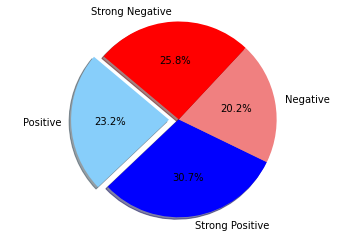

In [80]:
# Pie Chart Visualization
# Data to plot
labels = 'Positive', 'Strong Positive', 'Negative', 'Strong Negative'

# Get values from above where details are printed
#Positive
#True     1383
#False    1182
strngPos = 788
strngNeg = 663
totalPos = 1383
totalNeg = 1182

sizes = [(totalPos - strngPos), strngPos,(totalNeg - strngNeg), strngNeg]
colors = ['lightskyblue', 'blue', 'lightcoral', 'red']
explode = (0.1, 0, 0, 0, )  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['Sentence: '])
#bow = bow_vectorizer.fit_transform('tokens')

#print(bow)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['Sentence: '])

#print (tfidf)

In [83]:
# Create dataframe of onle Positive or Negative sentences
sentences_pos = df[ df['Score'] > 0]
sentences_pos = sentences_pos['Sentence: ']

sentences_neg = df[ df['Score'] < 0]
sentences_neg = sentences_neg['Sentence: ']

sentences = df[ df['Score'] != 0]
sentences = sentences['Sentence: ']

In [84]:
# Show first positive sentences
sentences_pos.head()

0    \n\nA Guide to Scenic Hikes in Ohio\n\n\n\n\n\...
2    VESUVIUS RECREATION AREA – LAKESHORE LOOP\t43\...
5              So hiking in Ohio, how fun can that be?
6         Well my answer to that is no, of course not.
7    Where can some one who lives in the Cleveland,...
Name: Sentence: , dtype: object

In [85]:
# Show first negative sentences
sentences_neg.head()

1                  HELL HOLLOW WILDERNESS AREA\t23\n16.
3     There are no 200-foot waterfalls, or snow-capp...
4        That is where a serious hiker would go, right?
16    You do not want to be too cold or hot while hi...
19    You soon will be able to identify some of the ...
Name: Sentence: , dtype: object

In [86]:
# Show first of all sentences
sentences.head()

0    \n\nA Guide to Scenic Hikes in Ohio\n\n\n\n\n\...
1                 HELL HOLLOW WILDERNESS AREA\t23\n16.
2    VESUVIUS RECREATION AREA – LAKESHORE LOOP\t43\...
3    There are no 200-foot waterfalls, or snow-capp...
4       That is where a serious hiker would go, right?
Name: Sentence: , dtype: object

In [87]:
# Routine  to show detail of the sentence's sentiment components
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [88]:
# Show detail of sentence's sentiment components
sentiment_analyzer_scores(sentences_neg[10])

KeyError: ignored

In [89]:
# Sort sentence sentiment values by score
#
# Show highest values (positive sentiment)
df.sort_values(by=['Score'], ascending=False)
    
print(df.sort_values(by=['Score'], ascending=False)[1:25])

                                            Sentence:   ...  strngNeg
119  This often is a crowded area where many hikers...  ...     False
182  There is an old log shelter-house near the top...  ...     False
135  At this point, you are ready to explore and en...  ...     False
141  Take some time to enjoy the beauty of the many...  ...     False
152  You will come out to a nice opening, where the...  ...     False
27   I don’t attempt to be an expert in children, b...  ...     False
150  This trail does not add anything spectacular t...  ...     False
290  But first, enjoy the view from the wooden brid...  ...     False
32   Enjoying a cracker, cookie, or whatever, by a ...  ...     False
103  This is a good place to rest, go by the river ...  ...     False
0    \n\nA Guide to Scenic Hikes in Ohio\n\n\n\n\n\...  ...     False
299  Watching the usually tiny waterfall from this ...  ...     False
312  Enjoy the cool mist from the splash of the fal...  ...     False
85   The observation

In [90]:
# Show detail of sentence's Top 6

sentiment_analyzer_scores(sentences[1278])
sentiment_analyzer_scores(sentences[181])
sentiment_analyzer_scores(sentences[135])
sentiment_analyzer_scores(sentences[141])
sentiment_analyzer_scores(sentences[152])
sentiment_analyzer_scores(sentences[27])


KeyError: ignored

In [91]:
# Sort sentence sentiment values by score
#
# Show lowest values (negative sentiment)
df.sort_values(by='Score')

print(df.sort_values(by='Score')[1:25])

                                            Sentence:   ...  strngNeg
1                 HELL HOLLOW WILDERNESS AREA\t23\n16.  ...      True
265  There is a sign warning of the danger of the h...  ...      True
207  Hell Hollow Wilderness Area\n\n> Directions to...  ...      True
172  Keep a look out for these red trail markers, b...  ...      True
75       Sadly, the “Black Hand” is no longer visible.  ...      True
33       No one wants to hike while they are starving.  ...      True
277  There is also a warning sign about the danger ...  ...      True
364  > Trail Distance <\n2.6 miles (Pine Lake parki...  ...      True
195  After falling and rising through several deep ...  ...      True
51   The trail runs through a public hunting area, ...  ...      True
253  At post 9, the hiker is shown what every hiker...  ...      True
50            Also, poison ivy is abundant in patches.  ...      True
31     Stop often and rest, there is no need to hurry.  ...      True
379  You willl then 

In [93]:
# Show detail of sentence's Bottom 6

sentiment_analyzer_scores(sentences[1])
sentiment_analyzer_scores(sentences[264])
sentiment_analyzer_scores(sentences[206])
sentiment_analyzer_scores(sentences[172])
sentiment_analyzer_scores(sentences[33])
sentiment_analyzer_scores(sentences[75])



HELL HOLLOW WILDERNESS AREA	23
16.------ {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.7456}
As the splash at the bottom of the falls freezes, it can form a “stalagmite” shape spire of ice. {'neg': 0.058, 'neu': 0.942, 'pos': 0.0, 'compound': -0.0258}
Classed as a wrought-iron truss bridge, the span was built in 1881 and is an outstanding example of an early metal bridge. {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.6124}
Keep a look out for these red trail markers, because there are a few places where marked trees have fallen down, or the red blazes have faded to become a dull silver. {'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.6369}
No one wants to hike while they are starving. {'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6124}
Sadly, the “Black Hand” is no longer visible. {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.6124}


In [94]:
# Show Sentiment score for each WORD in a sentence  - DO NOT INCLUDE NEUTRAL SENTIMENT SENTENCES


rows = []
#print(text_lower_no_punc)
#di = text_orig
di = text_lower_no_punc
sen = tokenize.word_tokenize(di)
for s in sen:
    pol = analyzer.polarity_scores(s)['compound']
    # check if sentence s has sentiment/ nonzero polarity
    if pol != 0:
        # check the polarity of the sentence.
        # append a dictionary with info regarding the sentence into rows
        rows.append({'Word':s,
                     'Score': pol, 'isPos': pol>0, 'isNeutral': pol==0, 'isNeg': pol<0, 'strngPos': pol>0.5, 'strngNeg': pol<-0.5})
#        print('Sentence: ', s, 'Score', pol, 'isPos', pol>0, '/n')


# convert the rows into a dataframe for easier plotting and analysis
df_word = pd.DataFrame(rows)

print(df_word.head())

        Word   Score  isPos  isNeutral  isNeg  strngPos  strngNeg
0  dedicated  0.4588   True      False  False     False     False
1       love  0.6369   True      False  False      True     False
2       hell -0.6808  False      False   True     False      True
3   gorgeous  0.6124   True      False  False      True     False
4         no -0.2960  False      False   True     False     False


In [95]:
# Show Sentiment score for each sentence  - DO NOT INCLUDE NEUTRAL SENTIMENT SENTENCES


rows_neg = []
rows_pos = []
rows_neu = []

rows_neg_text = ''
rows_pos_text = ''
rows_neu_text = ''

#print(text_lower_no_punc)
#di = text_orig
di = text_lower_no_punc
sen = tokenize.word_tokenize(di)
for s in sen:
    pol = analyzer.polarity_scores(s)['compound']
    # check if sentence s has sentiment/ nonzero polarity
    if pol == 0:
        # check the polarity of the sentence.
        # append a dictionary with info regarding the sentence into rows
        rows_neu.append({'Word':s,
                     'Score': pol, 'isPos': pol>0, 'isNeutral': pol==0, 'isNeg': pol<0, 'strngPos': pol>0.5, 'strngNeg': pol<-0.5})
        rows_neu_text = rows_neu_text + s + ' '

    if pol > 0:
        # check the polarity of the sentence.
        # append a dictionary with info regarding the sentence into rows
        rows_pos.append({'Word':s,
                     'Score': pol, 'isPos': pol>0, 'isNeutral': pol==0, 'isNeg': pol<0, 'strngPos': pol>0.5, 'strngNeg': pol<-0.5})
        rows_pos_text = rows_pos_text + s + ' '

    if pol < 0:
        # check the polarity of the sentence.
        # append a dictionary with info regarding the sentence into rows
        rows_neg.append({'Word':s,
                     'Score': pol, 'isPos': pol>0, 'isNeutral': pol==0, 'isNeg': pol<0, 'strngPos': pol>0.5, 'strngNeg': pol<-0.5})
        rows_neg_text = rows_neg_text + s + ' '


#        print('Sentence: ', s, 'Score', pol, 'isPos', pol>0, '/n')


# convert the rows into a dataframe for easier plotting and analysis
df_word_neg = pd.DataFrame(rows_neg)
df_word_neu = pd.DataFrame(rows_neu)
df_word_pos = pd.DataFrame(rows_pos)

print(df_word_neg.head())

      Word   Score  isPos  isNeutral  isNeg  strngPos  strngNeg
0     hell -0.6808  False      False   True     False      True
1       no -0.2960  False      False   True     False     False
2  serious -0.0772  False      False   True     False     False
3       no -0.2960  False      False   True     False     False
4  torture -0.5994  False      False   True     False      True


In [96]:
print(rows_neg_text)

hell no serious no torture stop broken challenged no forgotten worse tired stop no no starving dirty stop warning poison avoid gun gravel low avoid stop stop low cut cut sadly no no cut gravel hard lazy hard block fallen battleship low lower no broken drained difficult low difficult abandoned illegal stop fallen dull block missing graveled graveled warning falling abandoned lowland graveled leave hell dangerous warning avoid leave gravel stop wrong broken gravel dirt lone low stop lonesome nuts poison vultures dominating freezing freezes warning danger fatal stop dirt missed missed warning danger no fatal hiding leave fire falling cut falling cut lower lower gravel thorny irony serious injury death falling lies fallen gravel dominate lying disturbance vultures eerie haunted leave damn fire fire fire fire fire fire missed lower cuts cut blocks 


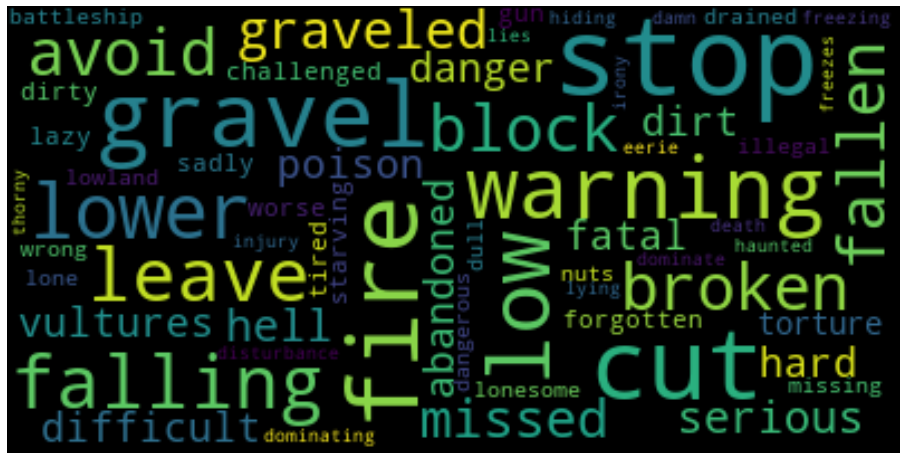

In [97]:
# Create and generate a word cloud image for the NEGATIVE words in the text:
wordcloud = WordCloud(stopwords=stop_words,max_words=100, background_color="black",max_font_size=50).generate(rows_neg_text)

# Display the generated image:
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

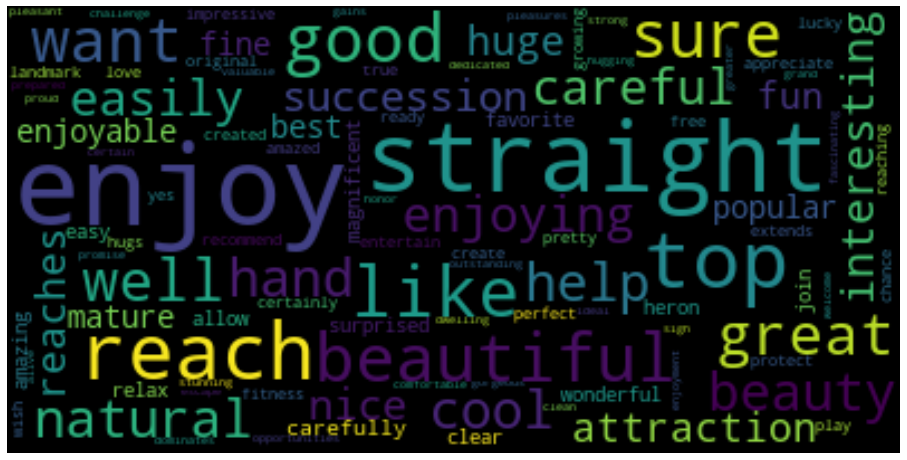

In [98]:
# Create and generate a word cloud image for the POSITIVE words in the text:
wordcloud = WordCloud(stopwords=stop_words,max_words=100, background_color="black",max_font_size=50).generate(rows_pos_text)

# Display the generated image:
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

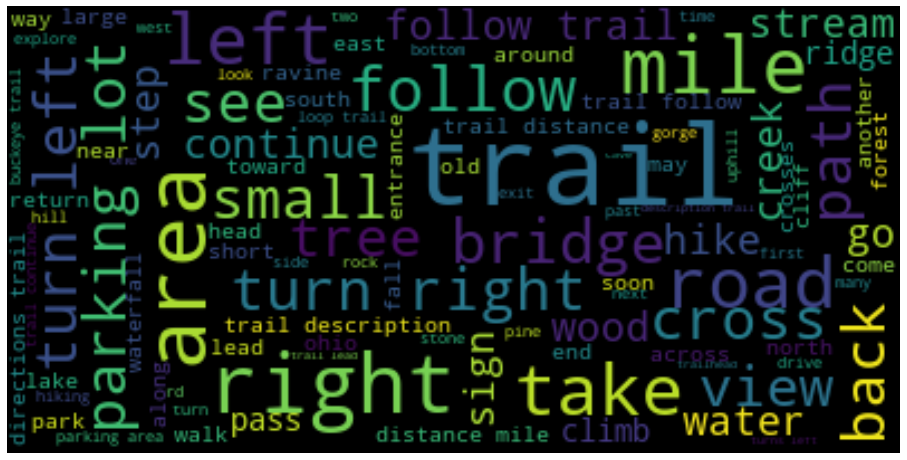

In [99]:
# Create and generate a word cloud image for the NEUTRAL words in the text:
wordcloud = WordCloud(stopwords=stop_words,max_words=100, background_color="black",max_font_size=50).generate(rows_neu_text)

# Display the generated image:
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

In [ ]:
# Stuff below may not work

In [ ]:
# Positional taggingg

nltk.pos_tag(tokenized_word)

In [ ]:
nltk.help.upenn_tagset('JJ')

In [ ]:
# Standard treebank POS tagger
_POS_TAGGER = 'taggers/maxent_treebank_pos_tagger/english.pickle'
def pos_tag(tokens):
    """
    Use NLTK's currently recommended part of speech tagger to
    tag the given list of tokens.
 
        >>> from nltk.tag import pos_tag # doctest: +SKIP
        >>> from nltk.tokenize import word_tokenize # doctest: +SKIP
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad.")) # doctest: +SKIP
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is',
        'VBZ'), ("n't", 'RB'), ('all', 'DT'), ('that', 'DT'), ('bad', 'JJ'),
        ('.', '.')]
 
    :param tokens: Sequence of tokens to be tagged
    :type tokens: list(str)
    :return: The tagged tokens
    :rtype: list(tuple(str, str))
    """
    tagger = load(_POS_TAGGER)
    return tagger.tag(tokens)
 
def batch_pos_tag(sentences):
    """
    Use NLTK's currently recommended part of speech tagger to tag the
    given list of sentences, each consisting of a list of tokens.
    """
    tagger = load(_POS_TAGGER)
    return tagger.batch_tag(sentences)

In [ ]:
from nltk.corpus import treebank
len(treebank.tagged_sents())
#3914
train_data = treebank.tagged_sents()[:3000]
test_data = treebank.tagged_sents()[3000:]
train_data[0]

In [ ]:
from nltk.tag import tnt
tnt_pos_tagger = tnt.TnT()
tnt_pos_tagger.train(train_data)         
#tnt_pos_tagger.train(tokenized_word)tokenized_word
tnt_pos_tagger.evaluate(test_data)
#tnt_pos_tagger.evaluate(tokenized_word)

In [ ]:
#-----------------------------------------------
# WordCLoud for common words grouped together
#-----------------------------------------------
# Collocate clouds are another variation of tag clouds, which visualize particular words that frequently collocate 
# (are found next to one another). They fall under the general class of N-Gram problems, with the most common examples 
# being Bi-grams (two) and Tri-grams (three).
#
# N-Grams have many applications in genomics and are used in algorithms for grammar correction and text compression. 
#
#tokens=nltk.word_tokenize(text_lower_no_punc)
#
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
bi_dict = dict()
bg_measures = BigramAssocMeasures()
#print ("readme: ", readme)
#for readme in readmes:
#words = tokens
bi_finder = BigramCollocationFinder.from_words(tokens)
bi_collocs = bi_finder.nbest(bg_measures.likelihood_ratio, 10)
for colloc in bi_collocs:
    bi_dict[colloc] += 1

In [ ]:
# import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_summary = dict()
print (sentiment_summary)

In [ ]:
# import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_summary = dict()
sentiment_summary
#for readme in readmes:
sentences = nltk.tokenize.sent_tokenize(text_lower_no_punc)
for sentence in sentences:
    sentiment_score = sid.polarity_scores(sentence)
    if sentiment_score['compound'] == 0.0:
        sentiment_summary['neutral'] += 1
    elif sentiment_score['compound'] > 10.0:
        sentiment_summary['positive'] += 1
    else:
        sentiment_summary['negative'] += 1

In [ ]:
#sid = SentimentIntensityAnalyzer(text_orig)
#for sentence in text:
#     print(sentence)
#     ss = sid.polarity_scores(sentence)
#     for k in ss:
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#     print()

In [ ]:
df.Sentiment.value_counts()

In [ ]:
Sentiment_count=data.groupby("Sentiment").count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))